# **Lab: Simple linear regression**


Fitting a Simple Linear Regression Model on Boston Housing data

**Loading the data**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,delim_whitespace=True,names=names,na_values='?')

Display the first six rows of the data frame

In [ ]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


**Basic Manipulations on the Data**

What is the shape of the data? How many attributes are there? How many samples? Print a statement of the form:

num samples=xxx, num attributes=yy

In [ ]:
print("num samples = {}, num attributes = {}".format(df.shape[0], df.shape[1]))

num samples = 506, num attributes = 14


Create a response vector y with the values in the column PRICE. The vector y should be a 1D numpy.array structure.

In [ ]:
y = np.array(df['PRICE'])

numpy.ndarray

Use the response vector y to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap. Prices have gone up a lot since the 1970s!). Create print statements of the form:

The mean house price is xx.yy thousands of dollars.
Only x.y percent are above $40k.

In [ ]:
avg = np.mean(y)
print(avg)
z = np.mean(y > 40)
print('The mean house price is {:.3f} thousands of dollars, Only {:.5f} percent are above $40k'.format(avg, z))

22.532806324110677
The mean house price is 22.533 thousands of dollars, Only 0.06126 percent are above $40k


**Visualizing the Data**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

Similar to the y vector, create a predictor vector x containing the values in the RM column, which represents the average number of rooms in each region.

In [ ]:
x =np.array(df['RM'])


Create a scatter plot of the price vs. the RM attribute. Make sure your plot has grid lines and label the axes with reasonable labels so that someone else can understand the plot.

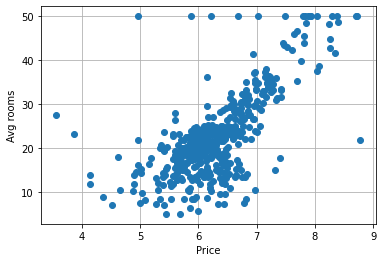

In [ ]:
plt.plot(x,y,'o')
plt.xlabel('Price')
plt.ylabel('Avg rooms')
plt.grid(True)

**Fitting a Simple Linear Model**

We will write a simple function to perform a linear fit. Use the formulae given in the class, to compute the parameters $\beta_0,\beta_1$ in the linear model$$y =\beta_0 + \beta_1 x + \epsilon$$as well as the coefficient of determination $R^2$.

In [ ]:
def fit_linear(x,y):
  xm = np.mean(x)
  ym = np.mean(y)
  syy = np.mean((y-ym)**2)
  syx = np.mean((y-ym)*(x-xm))
  sxx = np.mean((x-xm)**2)
  beta1 = syx/sxx
  beta0 = ym - beta1*xm
  rsq = (syx/(sxx * syy)**0.5)**2
  return beta0, beta1, rsq

Using the function fit_linear above, print the values beta0, beta1 and rsq for the linear model of price vs. number of rooms.

In [ ]:
beta0, beta1, rsq = fit_linear(x,y)

Replot the scatter plot above, but now with the regression line. You can create the regression line by creating points xp from say 4 to 9, computing the linear predicted values yp on those points and plotting yp vs. xp on top of the above plot.

0.483525455991334


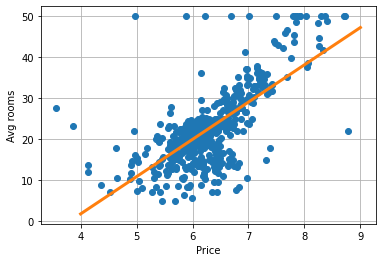

In [ ]:
xplt = np.array([4,9])          
yplt = beta1*xplt + beta0
print(rsq)
plt.plot(x,y,'o')                   
plt.plot(xplt,yplt,'-',linewidth=3)  
plt.xlabel('Price')
plt.ylabel('Avg rooms')
plt.grid(True)

**Compute coefficients of determination**

We next compute the $R^2$ values for all the predictors and output the values in a table. Your table should look like the following, where each the first column is the attribute name and the second column is the $R^2$ value.

In [ ]:
for i in range (0, len(names)-1):
  x =np.array(df[names[i]])
  beta0, beta1, rsq = fit_linear(x,y)
  print('{:7}  {:.9f}' .format(names[i], rsq))

CRIM     0.150780469
ZN       0.129920845
INDUS    0.233990030
CHAS     0.030716130
NOX      0.182603043
RM       0.483525456
AGE      0.142094744
DIS      0.062464372
RAD      0.145638580
TAX      0.219525921
PTRATIO  0.257847318
B        0.111196118
LSTAT    0.544146298
